## Tree based Ensemble Model  
    - Bagged trees
    - Random forest
    - Boosted trees

- Ensemble models

    - Combine several simple models together to create one single meta model 
    - Regression ensemble: Final predection is the average predection from all the simple regression models in the ensemble
    - Classification ensemble: Final predection is the majority vote out of all the prediction made by the constituent          classifier that make up this ensemble

## Tree based Ensemble Model: Overview
    - While training the tree base ensemble models only a subset of total data is used by each of the base learner
    - The way this data is fed into each of the base learners is based on a data sampling scheme
    - Different sampling schemes give rise to different types of tree based ensembles 

- Data Sampling Scheme
    - Bagged trees: Bootstrap Sampling
    - Random forest: Bootstrap Sampling + Feature Sampling 
    - Boosted trees: Data Reweighing

## Bagged Tree 
    - The total error due to any machine learning algorithm: In-sample error + out of sample error
    - In-sample error: Inability of the machine learning algorithm to fit the training data well
    - Out of sample error: Inability of the learning algorithm to generalize well
    - Bagged tree uses tree based models as base learners to reduce in-sample error
    - While training a tree based ensemble the constituent tree models are allowed to grow many levels deep.Intricacies of 
      training data are captured intimately, thereby reducing the in-sample error
    - Each of the unpruned trees are fed bootstrapped samples of original data set to reduce the out of sample errors
    
- Bootstrapped Sampling: Sampling by replacement
    - Bootstrap sampling helps reducing the out of sample error as it simulated variation and varity in the data 
    
- Hyperparameters of the Bagged tree 
    - Number of tree used to build an ensemble
    - Depth of the tree
    - Number of observations per mode of a tree
    - We can use K-fold cross varidation to get an estimate of out of sample error for each of the models and choose the model
    with lowest error

## Random Forest
    - Very similar to bagged trees
    - Only differs in resampling data
    - For each base learner (decision tree), at each split only a subset of features are considered  
    - Random forest: Bootstrap Sampling + Feature Sampling 

In [1]:
## Ensemble classifier

# Standard imports
import os
import pandas as pd
import numpy as np
%matplotlib inline

data_dir='C:\\Users\\UJJWAL\\Desktop\\PythonProgramming\\Tree_Based_Models'

In [2]:
# Changing working directory
os.chdir(data_dir)

In [3]:
# Import data
hr_data=pd.read_csv('hr.csv')

In [4]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
hr_data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [9]:
hr_data.sales.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
hr_data.rename({'sales':'dept'},inplace=True)

In [11]:
hr_data.salary.head()

0       low
1    medium
2    medium
3       low
4       low
Name: salary, dtype: object

In [12]:
X=hr_data.drop('left',axis=1)
y=hr_data['left']

In [15]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,sales,low
1,0.80,0.86,5,262,6,0,0,sales,medium
2,0.11,0.88,7,272,4,0,0,sales,medium
3,0.72,0.87,5,223,5,0,0,sales,low
4,0.37,0.52,2,159,3,0,0,sales,low


In [16]:
X=pd.get_dummies(X)

In [17]:
X.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=400,test_size=0.20)

In [19]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [20]:
clf= BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=20,random_state=400,base_estimator=DecisionTreeClassifier())

In [21]:
clf.fit(X_train,y_train)

C:\Users\UJJWAL\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\UJJWAL\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=20, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [22]:
clf.oob_score_

0.9876656388032335

In [23]:
clf.score(X_test,y_test)

0.986

In [27]:
# Out of bag error is a good proxy for out of sample accuracy of ensemble tree models 

for w in range (10,300,20):
    clf= BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=w,random_state=400,base_estimator=DecisionTreeClassifier())
    clf.fit(X_train,y_train)
    oob=clf.oob_score_
    print ('For n_estimators='+str(w))
    print ('OOB score is' +str(oob))
    print ('**********************')


C:\Users\UJJWAL\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:605: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\UJJWAL\Anaconda3\lib\site-packages\sklearn\ensemble\bagging.py:610: RuntimeWarning: invalid value encountered in true_divide
  predictions.sum(axis=1)[:, np.newaxis])


For n_estimators=10
OOB score is0.9834152846070506
**********************
For n_estimators=30
OOB score is0.9887490624218684
**********************
For n_estimators=50
OOB score is0.9894157846487207
**********************
For n_estimators=70
OOB score is0.9896658054837904
**********************
For n_estimators=90
OOB score is0.9899991665972164
**********************
For n_estimators=110
OOB score is0.9899991665972164
**********************
For n_estimators=130
OOB score is0.9903325277106425
**********************
For n_estimators=150
OOB score is0.990415867988999
**********************
For n_estimators=170
OOB score is0.9902491874322861
**********************
For n_estimators=190
OOB score is0.9902491874322861
**********************
For n_estimators=210
OOB score is0.9903325277106425
**********************
For n_estimators=230
OOB score is0.9903325277106425
**********************
For n_estimators=250
OOB score is0.9902491874322861
**********************
For n_estimators=270
OOB score 

In [28]:
# till 150 trees the oob increae and the starts decreasing
# finalizing the tree model on 150 trees

clf= BaggingClassifier(oob_score=True,n_jobs=-1,n_estimators=150,random_state=400,base_estimator=DecisionTreeClassifier())
clf.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=150, n_jobs=-1, oob_score=True,
         random_state=400, verbose=0, warm_start=False)

In [29]:
# Feature Importance
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1859118377, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1559503733, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features=None, max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_f

In [30]:
clf.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1859118377, splitter='best')

In [34]:
print(clf.estimators_[0].feature_importances_)

[5.05185266e-01 1.32251724e-01 1.09587124e-01 7.25383689e-02
 1.56214185e-01 9.76820763e-04 3.25164961e-04 9.23689326e-04
 1.08236025e-03 2.53569257e-03 4.89440705e-04 1.25078175e-03
 8.91752891e-04 8.14953601e-04 2.43254883e-03 2.96508657e-03
 3.16484751e-03 5.68842690e-04 4.96944845e-03 8.31900643e-04]


In [35]:
# We can extract feature importance from each tree and take mean of all trees
imp=[]
for i in clf.estimators_:
    imp.append(i.feature_importances_)
imp=np.mean(imp,axis=0)
    

In [36]:
feature_importance=pd.Series(imp,index=X.columns.tolist())

In [37]:
feature_importance.sort_values(ascending=False)

satisfaction_level       0.494260
last_evaluation          0.138175
time_spend_company       0.137465
number_project           0.110373
average_montly_hours     0.097373
sales_technical          0.003132
salary_low               0.003084
sales_support            0.002837
sales_sales              0.002542
salary_medium            0.002088
Work_accident            0.001566
sales_IT                 0.001562
sales_accounting         0.001390
salary_high              0.000880
sales_marketing          0.000712
sales_product_mng        0.000667
sales_RandD              0.000642
sales_hr                 0.000590
sales_management         0.000490
promotion_last_5years    0.000174
dtype: float64

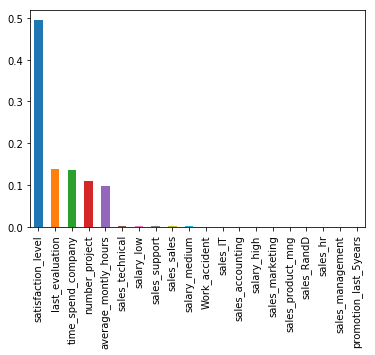

In [38]:
feature_importance.sort_values(ascending=False).plot(kind='bar')

In [ ]:
# Boosting: Another tree based ensemble technique 
# Boosted trees works differently than bagged trees and random forests
